<a href="https://colab.research.google.com/github/hekmat-ashqer/MLJourney2024/blob/main/Abalone%20Pre-Preprocessing%20assignment/Abalone_Pre_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Abalone Pre-Preprocessing


by : Hikmat AShqar

## overview

<hr>
<h2>Abalone Pre-Preprocessing (Core):</h2>
<p><br></p>
<p>Abalone are small marine snails, and this dataset contains information about the sex (note that the dataset includes F (female), M(male), and I (infant).  It also includes various measurements with lengths in mm and weights in grams.  And finally, the dataset includes the number of rings on the shell. Similar to trees, the number of rings on an Abalone shell can be used to determine its age.  Our machine-learning task will be to predict the number of rings.  For this assignment, you will be preparing the dataset for modeling.<span style="color: rgb(51, 51, 51); font-family: &quot;Trebuchet MS&quot;, &quot;Helvetica Neue&quot;, Helvetica, Tahoma, sans-serif;"></span><br></p>
<p></p>
<p><img src="https://lh6.googleusercontent.com/vTPJPZlWpu6_BvFUaQMSOWJfZoOaQ_lAn0KDLedHlYoKcotgRzzJxN0fNBdoWJDfXCZ44A_h5qg8vRhg4FV3EdainmvaMv_nNK97SRSFTsqT7d6Q-5VLHWqEQv_Ss2DJcopYAHep" width="388" height="153" style="margin-top: 0px; margin-left: 0px;"></p>
<h3>Prepare the Abalone Dataset for Modeling</h3>
<p><strong>The rings column will be your target column.</strong></p>
<p>The direct URL for the dataset is <a href="https://docs.google.com/spreadsheets/d/1jfU2oFSfhX1ywUbqETExDJuztO95r3h6pbWAm7xpwNY/gviz/tq?tqx=out:csv&amp;sheet=users" target="_blank">here</a> and can be copied directly into pd.read_csv.  (Click <a href="https://archive.ics.uci.edu/ml/datasets/abalone" target="_blank">here</a> for the original source of the data.)</p>

<hr>

## instruction

<h1>Tasks:</h1>
<ol><li><strong>Make sure to run the set_config function from sklearn to set the default transformation output to pandas.</strong></li><li><strong>Perform basic EDA on the entire dataframe: (For this assignment, you may skip the feature-by-feature inspection ):</strong><ol><li><strong>Check the data types </strong>and convert dtypes, if needed.</li><li><strong>Column for duplicate rows</strong> and address them, if needed.</li><li><strong>Check for null values</strong> and impute them if needed. (Impute them in a way that prevents data leakage!)</li><li><strong>Check for inconsistent categories</strong> and fix them if needed.</li><li><strong>Check for impossible numeric values </strong>and fix them, if needed,</li></ol></li><li>S<strong>eparate your data into the feature matrix (X) and the target vector (y)</strong><ol><li><em>rings </em>will be your y</li><li>The rest of the features will be your X</li></ol></li><li><strong>Train/test split the data.</strong> Please use the random number 42 for consistency.</li><li><strong>Create a ColumnTransformer to preprocess the data.</strong> Remember to:<ol><li><strong>Create lists of column names</strong> for numeric and categorical columns.</li><li><strong>Create a StandardScaler </strong>for scaling numeric columns.</li><li>    <strong>Create a OneHotEncoder</strong> for one-hot encoding the categorical columns.</li><li><strong>Create a tuple for each transformer with the: name, the transformer object, and the list of columns.</strong></li><li><strong>Use the tuples to create a ColumnTransformer </strong>to preprocess the data. <br>Make sure to set verbose_feature_names_out to False!</li></ol></li><li><strong>Fit the ColumnTransformer on your training data.</strong></li><li><strong>Transform the training and test data </strong>and save them as new variables, named appropriately (e.g., X_train_tf/X_train_processed, X_test_tf/X_test_processed.</li><li><strong>Check the transformed training data</strong>:<ol><li>Confirm that all columns are numeric dtypes.</li><li>Confirm that the original numeric features have been scaled.</li></ol></li></ol>
<p><br></p>
        </div>

## Data Loading

In [2]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',100)
import missingno
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector,ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
# Set pandas as the default output for sklearn
from sklearn import set_config
set_config(transform_output='pandas')

In [3]:
# Load data directly from url
df = pd.read_csv('https://docs.google.com/spreadsheets/d/1jfU2oFSfhX1ywUbqETExDJuztO95r3h6pbWAm7xpwNY/gviz/tq?tqx=out:csv&sheet=users')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             4177 non-null   object 
 1   length          4177 non-null   float64
 2   diameter        4177 non-null   float64
 3   height          4177 non-null   float64
 4   whole_weight    4177 non-null   float64
 5   shucked_weight  4177 non-null   float64
 6   viscera_weight  4177 non-null   float64
 7   shell_weight    4177 non-null   float64
 8   rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


## Feature Inspection

### EDA Functions


In [11]:

def explore_categorical(df, x, fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None):

  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # Before filling nulls, save null value counts and percent for printing
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=figsize)
  # Plotting a count plot
  sns.countplot(data=temp_df, x=x, ax=ax, order=order)
  # Rotate Tick Labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add a title with the feature name included
  ax.set_title(f"Column: {x}")

  # Fix layout and show plot (before print statements)
  fig.tight_layout()
  plt.show()

  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")
  # First find value counts of feature
  val_counts = temp_df[x].value_counts(dropna=False)
  # Define the most common value
  most_common_val = val_counts.index[0]
  # Define the frequency of the most common value
  freq = val_counts.values[0]
  # Calculate the percentage of the most common value
  perc_most_common = freq / len(temp_df) * 100
  # Print the results
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax



def plot_categorical_vs_target(df, x, y='SalePrice',figsize=(6,4),
                            fillna = True, placeholder = 'MISSING',
                            order = None):
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)

  # or drop nulls prevent unwanted 'nan' group in stripplot
  else:
    temp_df = temp_df.dropna(subset=[x])
  # Create the figure and subplots
  fig, ax = plt.subplots(figsize=figsize)

    # Barplot
  sns.barplot(data=temp_df, x=x, y=y, ax=ax, order=order, alpha=0.6,
              linewidth=1, edgecolor='black', errorbar=None)

  # Boxplot
  sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax,
                order=order, hue_order=order, legend=False,
                edgecolor='white', linewidth=0.5,
                size=3,zorder=0)
  # Rotate xlabels
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

  # Add a title
  ax.set_title(f"{x} vs. {y}")
  fig.tight_layout()
  return fig, ax


def explore_numeric(df, x, figsize=(6,5) ):
  # Making our figure with gridspec for subplots
  gridspec = {'height_ratios':[0.7,0.3]}
  fig, axes = plt.subplots(nrows=2, figsize=figsize,
                           sharex=True, gridspec_kw=gridspec)
  # Histogram on Top
  sns.histplot(data=df, x=x, ax=axes[0])
  # Boxplot on Bottom
  sns.boxplot(data=df, x=x, ax=axes[1])
  ## Adding a title
  axes[0].set_title(f"Column: {x}")
  ## Adjusting subplots to best fill Figure
  fig.tight_layout()

  # Ensure plot is shown before message
  plt.show()
  ## Print message with info on the count and % of null values
  null_count = df[x].isna().sum()
  null_perc = null_count/len(df)* 100

  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = df[x].nunique()
  print(f"- Unique Values: {nunique}")
  # First find value counts of feature
  val_counts = df[x].value_counts(dropna=False)
  # Define the most common value
  most_common_val = val_counts.index[0]
  # Define the frequency of the most common value
  freq = val_counts.values[0]
  # Calculate the percentage of the most common value
  perc_most_common = freq / len(df) * 100
  # Print the results
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")



def plot_numeric_vs_target(df, x, y='SalePrice', figsize=(6,4), **kwargs): # kwargs for sns.regplot
  # Calculate the correlation
  corr = df[[x,y]].corr().round(2)
  r = corr.loc[x,y]
  # Plot the data
  fig, ax = plt.subplots(figsize=figsize)
  scatter_kws={'ec':'white','lw':1,'alpha':0.8}
  sns.regplot(data=df, x=x, y=y, ax=ax, scatter_kws=scatter_kws, **kwargs) # Included the new argument within the sns.regplot function
  ## Add the title with the correlation
  ax.set_title(f"{x} vs. {y} (r = {r})")
  # Make sure the plot is shown before the print statement
  plt.show()
  return fig, ax



### Check the data types


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             4177 non-null   object 
 1   length          4177 non-null   float64
 2   diameter        4177 non-null   float64
 3   height          4177 non-null   float64
 4   whole_weight    4177 non-null   float64
 5   shucked_weight  4177 non-null   float64
 6   viscera_weight  4177 non-null   float64
 7   shell_weight    4177 non-null   float64
 8   rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [6]:
df.describe()

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


### Check the duplicates


In [7]:
duplicates = df.duplicated().sum()
duplicates

0

### Check missing value


In [8]:
df.isna().sum().sum()

0

### Check for inconsistent categories

In [9]:
df['sex'].value_counts()

M    1528
I    1342
F    1307
Name: sex, dtype: int64

### Check for impossible numeric values

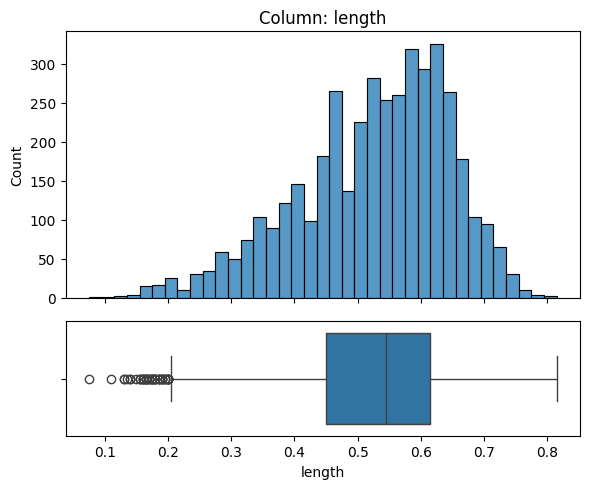

- NaN's Found: 0 (0.0%)
- Unique Values: 134
- Most common value: '0.625' occurs 94 times (2.25%)


In [12]:
feature = "length"
explore_numeric(df, feature);

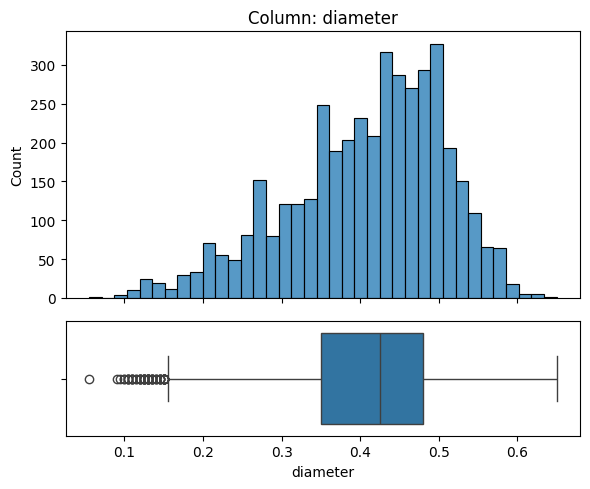

- NaN's Found: 0 (0.0%)
- Unique Values: 111
- Most common value: '0.45' occurs 139 times (3.33%)


In [13]:
feature = "diameter"
explore_numeric(df, feature);

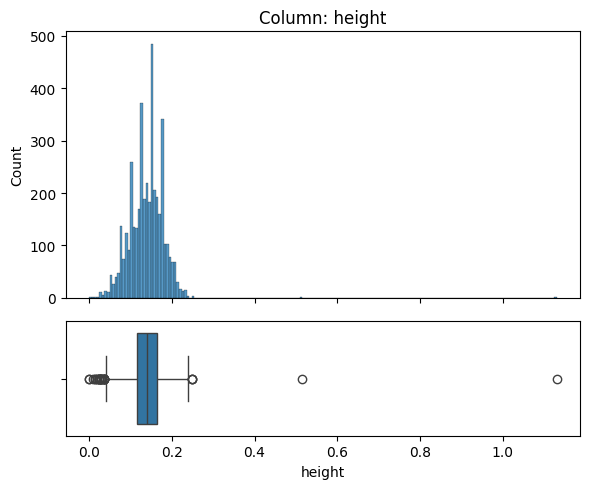

- NaN's Found: 0 (0.0%)
- Unique Values: 51
- Most common value: '0.15' occurs 267 times (6.39%)


In [14]:
feature = "height"
explore_numeric(df, feature);

after search height for abaldon may reach more than 1 mm so outlayer is correct  

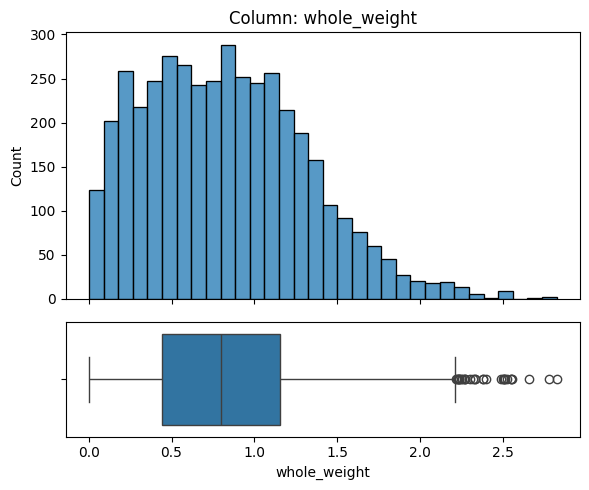

- NaN's Found: 0 (0.0%)
- Unique Values: 2429
- Most common value: '0.2225' occurs 8 times (0.19%)


In [15]:
feature = "whole_weight"
explore_numeric(df, feature);

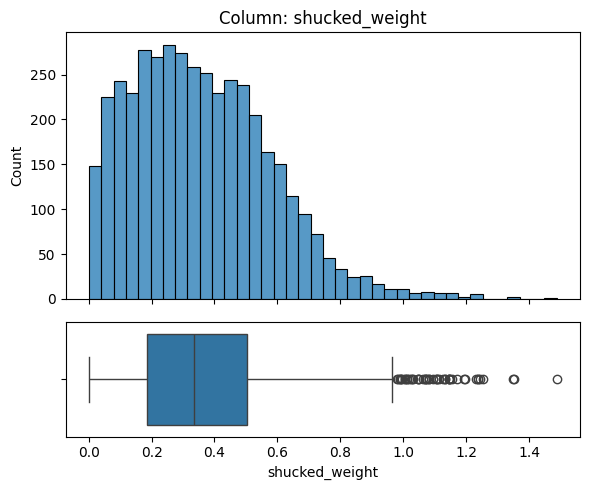

- NaN's Found: 0 (0.0%)
- Unique Values: 1515
- Most common value: '0.175' occurs 11 times (0.26%)


In [16]:
feature = "shucked_weight"
explore_numeric(df, feature);

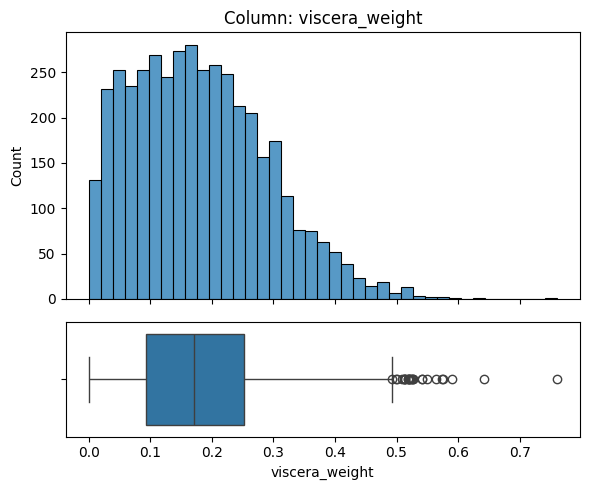

- NaN's Found: 0 (0.0%)
- Unique Values: 880
- Most common value: '0.1715' occurs 15 times (0.36%)


In [17]:
feature = "viscera_weight"
explore_numeric(df, feature);

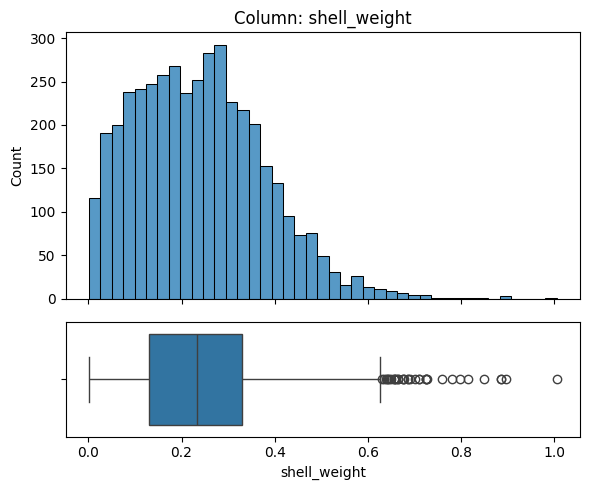

- NaN's Found: 0 (0.0%)
- Unique Values: 926
- Most common value: '0.275' occurs 43 times (1.03%)


In [18]:
feature = "shell_weight"
explore_numeric(df, feature);

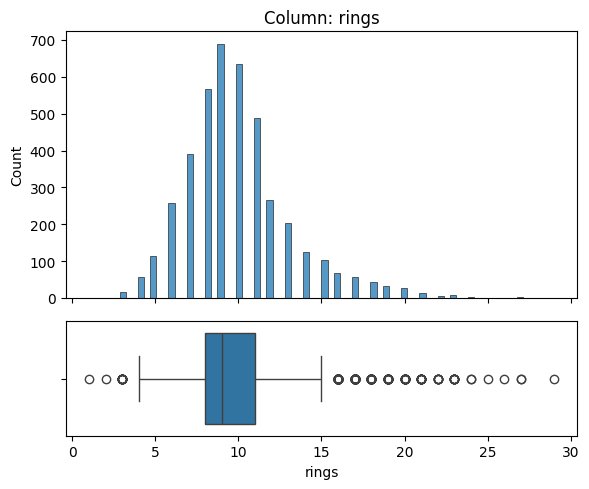

- NaN's Found: 0 (0.0%)
- Unique Values: 28
- Most common value: '9' occurs 689 times (16.5%)


In [19]:
feature = "rings"
explore_numeric(df, feature);

## Train/test split the data

In [20]:
# The target we are trying to predict
target = 'rings'
y = df[target]
# The features we will use to make the prediction
X = df.drop(columns=[target])

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train.head()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight
3823,F,0.615,0.455,0.135,1.0590,0.4735,0.2630,0.274
3956,F,0.515,0.395,0.140,0.6860,0.2810,0.1255,0.220
3623,M,0.660,0.530,0.175,1.5830,0.7395,0.3505,0.405
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
2183,M,0.495,0.400,0.155,0.8085,0.2345,0.1155,0.350


## Create a ColumnTransformer to preprocess the data

### Create lists of column names

In [21]:
# Defining lists of types of features
num_cols = X_train.select_dtypes("number").columns
num_cols

Index(['length', 'diameter', 'height', 'whole_weight', 'shucked_weight',
       'viscera_weight', 'shell_weight'],
      dtype='object')

In [22]:
# Defining list of nominal features
ohe_cols = X_train.select_dtypes('object').columns
ohe_cols

Index(['sex'], dtype='object')

### Create a StandardScaler

In [23]:
scaler = StandardScaler()

### Create a OneHotEncoder

In [24]:
ohe_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

### Create a tuple for each transformer

In [25]:
# Making a ohe_tuple for ColumnTransformer
ohe_tuple = ('categorical', ohe_encoder, ohe_cols)
# Making a numeric tuple for ColumnTransformer
num_tuple = ('numeric', scaler, num_cols)

### Use the tuples to create a ColumnTransformer

In [26]:
# Instantiate with verbose_feature_names_out=False
col_transformer = ColumnTransformer([num_tuple, ohe_tuple],
                                    verbose_feature_names_out=False)

## Fit the ColumnTransformer on your training data

In [27]:
# Fit on training data
col_transformer.fit(X_train)

ColumnTransformer(transformers=[('numeric', StandardScaler(),
                                 Index(['length', 'diameter', 'height', 'whole_weight', 'shucked_weight',
       'viscera_weight', 'shell_weight'],
      dtype='object')),
                                ('categorical',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse_output=False),
                                 Index(['sex'], dtype='object'))],
                  verbose_feature_names_out=False)

## Transform the training and test data

In [28]:
# Transform the training data
X_train_processed = col_transformer.transform(X_train)
X_test_processed = col_transformer.transform(X_test)

## Check the transformed training data:


Confirm that all columns are numeric dtypes

In [32]:
X_train_processed.dtypes

length            float64
diameter          float64
height            float64
whole_weight      float64
shucked_weight    float64
viscera_weight    float64
shell_weight      float64
sex_F             float64
sex_I             float64
sex_M             float64
dtype: object

Confirm that the original numeric features have been scaled.

In [33]:
X_train_processed.head()

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,sex_F,sex_I,sex_M
3823,0.749291,0.464226,-0.118869,0.457447,0.499098,0.743973,0.241135,1.0,0.0,0.0
3956,-0.090254,-0.144654,-0.001647,-0.301655,-0.364269,-0.514040,-0.145838,1.0,0.0,0.0
3623,1.127086,1.225326,0.818910,1.523852,1.692114,1.544526,1.179902,0.0,0.0,1.0
0,-0.593980,-0.449095,-1.056649,-0.651696,-0.617673,-0.738195,-0.647469,0.0,0.0,1.0
2183,-0.258163,-0.093914,0.350020,-0.052352,-0.572823,-0.605532,0.785763,0.0,0.0,1.0


In [34]:
df.head()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [38]:
df.describe().round(2)

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
count,4177.00,4177.00,4177.00,4177.00,4177.00,4177.00,4177.00,4177.00
mean,0.52,0.41,0.14,0.83,0.36,0.18,0.24,9.93
std,0.12,0.10,0.04,0.49,0.22,0.11,0.14,3.22
min,0.08,0.06,0.00,0.00,0.00,0.00,0.00,1.00
25%,0.45,0.35,0.12,0.44,0.19,0.09,0.13,8.00
50%,0.55,0.42,0.14,0.80,0.34,0.17,0.23,9.00
75%,0.62,0.48,0.16,1.15,0.50,0.25,0.33,11.00
max,0.82,0.65,1.13,2.83,1.49,0.76,1.00,29.00


In [37]:
X_train_processed.describe().round(2)

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,sex_F,sex_I,sex_M
count,3132.00,3132.00,3132.00,3132.00,3132.00,3132.00,3132.00,3132.00,3132.00,3132.00
mean,-0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,0.32,0.32,0.37
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.47,0.47,0.48
min,-3.78,-3.59,-3.28,-1.69,-1.62,-1.66,-1.71,0.00,0.00,0.00
25%,-0.64,-0.60,-0.59,-0.79,-0.79,-0.81,-0.79,0.00,0.00,0.00
50%,0.16,0.16,0.12,-0.06,-0.10,-0.09,-0.04,0.00,0.00,0.00
75%,0.75,0.72,0.58,0.66,0.65,0.67,0.64,1.00,1.00,1.00
max,2.43,2.44,23.21,4.05,5.05,5.29,5.48,1.00,1.00,1.00


## Conclusion



our  scaling process seems to have been done correctly for the purpose of standardization. The appearance of higher ranges in the scaled data is a natural outcome of standardizing data with significant variability or outliers. Whether this is problematic depends on the specific requirements of our  analysis or models and the sensitivity of those models to outliers. we might need to incorporate additional preprocessing steps or consider different scaling methods if outliers significantly impact our  model's performance.